# Verifying generalizability


In [7]:
%cd ../

/home/pepijn/Documents/uni/y5/thesis/amalur/amalur-experiments/results/full_1


In [80]:
from src.util import read_results, train_test_validate_split, eval_result, eval_sota_models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
result_df = read_results()
_, _, validate = train_test_validate_split(read_results())

train set:
	Records: 210953
	Positive (speedup > 1 with factorizing)/Negative: 39406/171547 = 0.23 s
	Dataset types: ['synthetic' 'hamlet']
\Compute Units: ['CPU 32c' '1080' 'CPU 16c' 'CPU 08c' 'v100' '2080' 'a40' 'p100']
test set:
	Records: 90409
	Positive (speedup > 1 with factorizing)/Negative: 17014/73395 = 0.23 s
	Dataset types: ['synthetic' 'hamlet']
\Compute Units: ['2080' '1080' 'CPU 16c' 'a40' 'v100' 'CPU 08c' 'CPU 32c' 'p100']
validate set:
	Records: 11187
	Positive (speedup > 1 with factorizing)/Negative: 1123/10064 = 0.11 s
	Dataset types: ['synthetic' 'hamlet' 'tpc_ai']
\Compute Units: ['p100' 'CPU 32c' 'CPU 16c' 'CPU 08c' '2080' '1080' 'v100' 'a40']


In [91]:
results = {}
for eval_type in ["new hardware", "new datasets", "full"]:
    val_df = result_df.loc[validate.index]
    if eval_type == "full":
        loc = val_df.index
    elif eval_type == "new hardware":
        loc = val_df[val_df.compute_unit == 'p100'].index
    else:
        loc = val_df[val_df.dataset_type != 'synthetic'].index
    y_true = validate.label.loc[loc]
    full_dataset = validate.loc[loc]
    
    results.update({(name, eval_type): val for (name, val) in eval_sota_models(full_dataset, y_true, full_dataset).items()})
    
    for type in ["stat", "xgb"]:
        df = pd.read_csv(f"evaluation/predictions/{type}_label.csv", index_col= 0)
        assert len(validate.index) == len(set(validate.index).intersection(df.index))
        print([col for col in df.columns if 'y_pred' in col])
        y_pred = df[[col for col in df.columns if 'y_pred' in col][0]]
        
        results[(type, eval_type)] = eval_result(y_true, y_pred.loc[loc], target_col='label', full_dataset=full_dataset)[0]
results.keys()

2024-03-24 22:34:33.550 | INFO     | src.util:eval_model:471 - Model <class 'src.estimators.MorpheusFI'>, MorpheusFI
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S',
       'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'spa

['stat_y_pred']
['xgb_y_pred_speedup']


2024-03-24 22:34:34.263 | INFO     | src.util:eval_model:471 - Model <class 'src.estimators.Amalur'>, Amalur
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S',
       'c_S', 'TR', 'FR', 'nnz_T', 'nnz_S_sum', 'nnz_S', 'r_T', 'c_T',
       'sparsity_T'

['stat_y_pred']
['xgb_y_pred_speedup']


2024-03-24 22:34:34.557 | INFO     | src.util:eval_model:474 - Score: 0.9019397514972736
2024-03-24 22:34:34.598 | INFO     | src.util:eval_model:471 - Model <class 'src.estimators.Morpheus'>, Morpheus
 test cols: Index(['speedup', 'operator', 'num_cores', 'selectivity', 'cardinality_T',
       'cardinality_S', 'join', 'complexity_ratio', 'times_mean',
       'compute_type', 'label', 'parallelism', 'mem_mat_read', 'mem_mat_write',
       'mem_fac_read', 'mem_fac_write', 'comp_scalar_mat', 'comp_lmm_mat',
       'comp_rmm_mat', 'comp_scalar_fac', 'comp_lmm_fac', 'comp_rmm_fac',
       'comp_mat_col_major', 'comp_fac_col_major', 'comp_scalar_dense', '13',
       '14', 'comp_matrix_dense', 'mem_read_scalar_dense',
       'mem_write_scalar_dense', 'mem_read_matrix_dense',
       'mem_write_matrix_dense', 'mem_read_rowsum', 'mem_write_rowsum',
       'mem_read_colsum', 'mem_write_colsum', '24', '25', 'comp_rowsum',
       'comp_colsum', 'comp_mat', 'comp_fac', 'comp_ratio', 'tr', 'fr', 'r_S

['stat_y_pred']
['xgb_y_pred_speedup']


dict_keys([('MorpheusFI', 'new hardware'), ('Morpheus', 'new hardware'), ('Amalur', 'new hardware'), ('stat', 'new hardware'), ('xgb', 'new hardware'), ('MorpheusFI', 'new datasets'), ('Morpheus', 'new datasets'), ('Amalur', 'new datasets'), ('stat', 'new datasets'), ('xgb', 'new datasets'), ('MorpheusFI', 'full'), ('Morpheus', 'full'), ('Amalur', 'full'), ('stat', 'full'), ('xgb', 'full')])

In [93]:
eval_results = pd.DataFrame(results).T
merged_results = (
    eval_results.reset_index(names=["model", "eval_type"])
    .merge(pd.json_normalize(eval_results.speedup), left_index=True, right_index=True)
    .drop(columns="speedup")
)
merged_results

,model,eval_type,accuracy,precision,recall,f1,y_true_mat_time,y_true_fact_time,y_true_best_time,y_true_time_saved,...,y_pred_mat_time,y_pred_fact_time,y_pred_best_time,y_pred_time_saved,y_pred_speedup_avg,y_pred_speedup_real,TP,FP,TN,FN
0,MorpheusFI,new hardware,0.058704,0.058776,0.979626,0.110898,1408.911454,472.685621,472.685621,936.225833,...,5201.873024,14099.029838,4282.279116,-8897.156814,0.530243,0.368953,"(577, 3.3198505631577966)","(9240, 0.3560437066846622)","(0, nan)","(12, 3.624838253778563)"
1,Morpheus,new hardware,0.267169,0.050435,0.629881,0.093392,1408.911454,472.685621,472.685621,936.225833,...,3302.083949,9981.705993,2884.934398,-6679.622045,0.451173,0.330814,"(371, 2.2116919019551227)","(6985, 0.3576650981051124)","(2255, 0.35102134789448713)","(218, 5.22254191909193)"
2,Amalur,new hardware,0.752671,0.043155,0.147708,0.066795,1408.911454,472.685621,472.685621,936.225833,...,1030.745609,1706.921812,893.265095,-676.176203,0.610594,0.603862,"(87, 2.584206354159701)","(1929, 0.5215815128061159)","(7311, 0.31236672296037205)","(502, 3.4546332294332616)"
3,stat,new hardware,0.712077,0.057988,0.249576,0.09411,1408.911454,472.685621,472.685621,936.225833,...,1162.755337,2274.334671,873.428825,-1111.579334,0.519215,0.511251,"(147, 2.5888593805354163)","(2388, 0.39181262956989443)","(6852, 0.3435778298822782)","(442, 3.571243224092048)"
4,xgb,new hardware,0.98362,0.85786,0.870968,0.864364,1408.911454,472.685621,472.685621,936.225833,...,1360.933479,492.703249,466.993476,868.230229,3.209736,2.762177,"(513, 3.6051607646755586)","(85, 0.8232331873566489)","(9155, 0.35170606541135585)","(76, 1.4421626540635502)"
5,MorpheusFI,new datasets,0.416503,0.419986,0.907855,0.574295,1895.431467,804.295675,804.295675,1091.135792,...,8615.560419,13233.603457,7565.970170,-4618.043037,2.589603,0.651037,"(601, 5.309016209463859)","(830, 0.6204859272719228)","(35, 0.4635063194603)","(61, 2.6003088841659823)"
6,Morpheus,new datasets,0.588736,0.559028,0.243202,0.338947,1895.431467,804.295675,804.295675,1091.135792,...,719.385092,626.455806,369.821568,92.929285,2.256180,1.148341,"(161, 3.5884141741026476)","(127, 0.5672856408388689)","(738, 0.6221961577645935)","(501, 5.532141520541672)"
7,Amalur,new datasets,0.652914,0.671875,0.389728,0.493308,1895.431467,804.295675,804.295675,1091.135792,...,764.917434,463.240961,332.248282,301.676473,2.721876,1.651230,"(258, 3.772472326329065)","(126, 0.5706541747294778)","(739, 0.6215475166453209)","(404, 5.881286444626252)"
8,stat,new datasets,0.517354,0.443946,0.44864,0.446281,1895.431467,804.295675,804.295675,1091.135792,...,4293.889436,5328.177577,3798.897923,-1034.288141,2.606120,0.805883,"(297, 5.08683567340648)","(372, 0.6255480572066262)","(493, 0.6055216298903477)","(365, 5.0371161337539165)"
9,xgb,new datasets,0.707269,0.636943,0.755287,0.691085,1895.431467,804.295675,804.295675,1091.135792,...,3299.265600,3003.345983,2340.894936,295.919617,4.181614,1.098530,"(500, 6.128488597243988)","(285, 0.7660445077607029)","(580, 0.5394885450086311)","(162, 1.7598350938266023)"


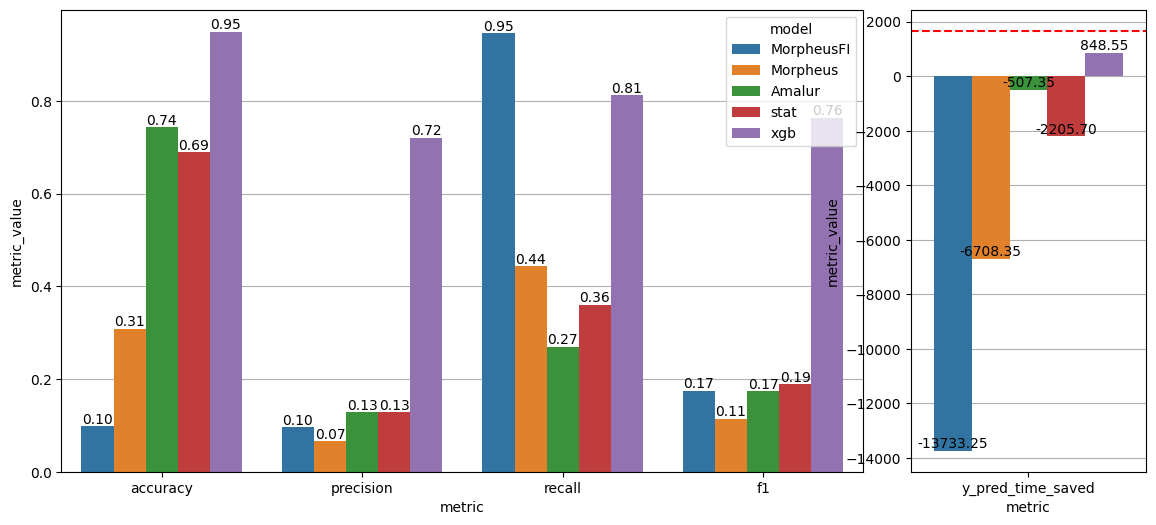

In [98]:
fig, axs = plt.subplot_mosaic("AAAB", figsize=(14, 6))
melted_df = pd.melt(merged_results, id_vars=["model", "eval_type"], var_name="metric", value_name="metric_value")
max_time_saved = merged_results.y_true_time_saved.max()
def plot_metrics(ax, metrics: list, legend=True):
    ax.set_axisbelow(True)
    ax.grid(axis="y")
    ax = sns.barplot(
        data=melted_df[(melted_df.metric.apply(lambda x: x in metrics)) & (melted_df.eval_type=='full')],
        x="metric",
        y="metric_value",
        hue="model",
        #  palette=sns.color_palette('flare'),
        ax=ax,
    )
    if not legend:
        ax.get_legend().remove()
    # Add metric values as text on top of every bar
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 5),
            textcoords="offset points",
        )

plot_metrics(axs["A"], ["accuracy", "precision", "recall", "f1"])
plot_metrics(axs["B"], ["y_pred_time_saved"], legend=False)
axs["B"].axhline(max_time_saved, ls="--", color="red", label="Maximum achievable time saved")

## New GPU


## New datasets